# Classification
Classification is a supervised machine learning method where the model tries to predict the correct label of a given input data. For example, an algorithm can learn to predict whether a given email is _spam_ or _not spam_.

There are two types of learners in machine learning classification: lazy and eager learners. 

__Eager learners__ are machine learning algorithms that first build a model from the training dataset before making any prediction on future datasets. They spend more time during the training process because of their eagerness to have a better generalization during the training from learning the weights, but they require less time to make predictions. 

Most machine learning algorithms are eager learners, and below are some examples: 
* Logistic Regression
* Support Vector Machine
* Decision Trees
* Artificial Neural Networks

__Lazy learners__ or __instance-based learners__, on the other hand, do not create any model immediately from the training data, and this is where the lazy aspect comes from. They just memorize the training data, and each time there is a need to make a prediction, they search for the nearest neighbor from the whole training data, which makes them very slow during prediction. Some examples of this kind are: 
* K-Nearest Neighbor
* Case-based reasoning

Let's dive deeper into some basic classification algorithms.

# Decision trees
We begin our overview of classification methods with one of the most popular ones – a decision tree. 

Decision trees are used in everyday life decisions, not just in machine learning. Flow diagrams are actually visual representations of decision trees. For example, here are the instructions for accepting a paper to a journal.

<img src="images/publication_flow.jpeg" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

In terms of machine learning, we can see it as a simple classifier that determines if paper is _published_ or _not published_ based on the content, review, editor's comments, etc.

A decision tree is often a generalization of the experts' experience, a means of sharing knowledge of a particular process. For example, before the introduction of scalable machine learning algorithms, the credit scoring task in the banking sector was solved by experts. The decision to grant a loan was made on the basis of some intuitively (or empirically) derived rules that could be represented as a decision tree.

<img src="images/credit_score.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

In this case, we solve a binary classification problem (approve/deny a loan) based on the `Age`, `Home-ownership`, `Income`, and `Education` features.

The decision tree as a machine learning algorithm is essentially the same thing as the diagram shown above; we incorporate a stream of logical rules of the form "feature $a$ value is less than $x$ and feature $b$ value is less than $y$ ... => Category 1" into a tree-like data structure. The advantage of this algorithm is that they are easily interpretable. For example, using the above scheme, the bank can explain to the client why they were denied for a loan: e.g the client does not own a house and his income is less than 5,000.

Many other models, although more accurate, do not have this property and can be regarded as more of a __black box__ approach, where it is harder to interpret how the input data was transformed into the output. Due to this _understandability_ and similarity to human decision-making (you can easily explain your model to your boss), decision trees have gained immense popularity.

## How to build a Decision Tree?

In our example, the decision to grant a loan is made based on age, assets, income, and other variables. But what variable to look at first? Let's start with a simple example where all the variables are binary.

Recall the game of "20 Questions", which is often referenced when introducing decision trees. One person thinks of a celebrity while the other tries to guess by asking only "Yes" or "No" questions. What question will the guesser ask first? Of course, they will ask the one that narrows down the number of the remaining options the most. Asking "Is it Brad Pitt?" would, in the case of a negative response, leave all but one celebrity in the realm of possibility. In contrast, asking "Is the celebrity a woman?" would reduce the possibilities to roughly half. That is to say, the "gender" feature separates the celebrity dataset much better than other features like "Brad Pitt", "American", or "loves sushi". This reasoning corresponds to the concept of information gain based on entropy.

Remember Shannon's entropy? It is defined for a system with $N$ possible states as follows:

$$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i},$$

where $p_i$ is the probability of finding the system in the $i$-th state. Entropy can be described as the degree of chaos in the system. The higher the entropy, the less ordered the system and vice versa. This will help us formalize "effective data splitting", which we alluded to in the context of "20 Questions".

To illustrate how entropy can help us identify good features for building a decision tree, let's predict the color of the ball based on its position.

<img src="images/balls.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

There are 9 blue balls and 11 yellow balls. If we randomly pull out a ball, then it will be blue with probability $p_1=\frac{9}{20}$ and yellow with probability $p_2=\frac{11}{20}$, which gives us an entropy $S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}} \approx 1$. This value by itself may not tell us much, but let's see how the value changes if we were to break the balls into two groups: with the position less than or equal to 12 and greater than 12.

<img src="images/balls2.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

The left group has 13 balls, 8 blue and 5 yellow. The entropy of this group is $S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96$. The right group has 7 balls, 1 blue and 6 yellow. The entropy of the right group is $S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6$. As you can see, entropy has decreased in both groups, more so in the right group. Since entropy is, in fact, the degree of chaos (or uncertainty) in the system, the reduction in entropy is called information gain. Formally, the information gain (IG) for a split based on the variable $Q$ (in this example it's a variable "$x \leq 12$") is defined as

$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$

where $q$ is the number of groups after the split, $N_i$ is number of objects from the sample in which variable $Q$ is equal to the $i$-th value. In our example, our split yielded two groups ($q = 2$), one with 13 elements ($N_1 = 13$), the other with 7 ($N_2 = 7$). Therefore, we can compute the information gain as

$$ \Large IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$

It turns out that dividing the balls into two groups by splitting on "coordinate is less than or equal to 12" gave us a more ordered system. Let's continue to divide them into groups until the balls in each group are all of the same color.

<img src="images/balls3.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

For the right group, we can easily see that we only need one extra partition using "coordinate less than or equal to 18". But, for the left group, we need three more. Note that the entropy of a group where all of the balls are the same color is equal to 0 ($\log_2{1} = 0$).

We have successfully constructed a decision tree that predicts ball color based on its position. This decision tree may not work well if we add any balls because it has perfectly fit to the training set (initial 20 balls). If we wanted to do well in that case, a tree with fewer "questions" or splits would be more accurate, even if it does not perfectly fit the training set. We will discuss the problem of overfitting later.

## Tree-building algorithm
We can make sure that the tree built in the previous example is optimal: it took only 5 "questions" (conditioned on the variable $x$) to perfectly fit a decision tree to the training set. Under other split conditions, the resulting tree would be deeper, i.e. take more "questions" to reach an answer.

At the heart of the popular algorithms for decision tree construction, such as __ID3__ or __C4.5__, lies the principle of greedy maximization of information gain: at each step, the algorithm chooses the variable that gives the greatest information gain upon splitting. Then the procedure is repeated recursively until the entropy is zero (or some small value to account for overfitting). Different algorithms use different heuristics for "early stopping" or "cut-off" to avoid constructing an overfitted tree. 

```python
def build(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t     
```

## Quality criteria for splits
We discussed how entropy allows us to formalize partitions in a tree. But this is only one heuristic; there exists others:

- Gini uncertainty (Gini impurity): $G = 1 - \sum\limits_k (p_k)^2$. Maximizing this criterion can be interpreted as the maximization of the number of pairs of objects of the same class that are in the same subtree (not to be confused with the Gini index).
- Misclassification error:  $E = 1 - \max\limits_k p_k$

In practice, misclassification error is almost never used, and Gini uncertainty and information gain work similarly.

For binary classification, entropy and Gini uncertainty take the following form:

$ S = -p_+ \log_2{p_+} -p_- \log_2{p_-} = -p_+ \log_2{p_+} -(1 - p_{+}) \log_2{(1 - p_{+})};$

$ G = 1 - p_+^2 - p_-^2 = 1 - p_+^2 - (1 - p_+)^2 = 2p_+(1-p_+).$

where ($p_+$ is the probability of an object having a label +).

If we plot these two functions against the argument $p_+$, we will see that the entropy plot is very close to the plot of Gini uncertainty, doubled. Therefore, in practice, these two criteria are almost identical.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

/var/folders/f4/1lqq78l96fl0g_767m0lyysw0000gn/T/ipykernel_64933/1036662087.py:5: RuntimeWarning: divide by zero encountered in log2
  plt.plot(xx, [-x * np.log2(x) - (1 - x) * np.log2(1 - x) for x in xx], label="entropy")
/var/folders/f4/1lqq78l96fl0g_767m0lyysw0000gn/T/ipykernel_64933/1036662087.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  plt.plot(xx, [-x * np.log2(x) - (1 - x) * np.log2(1 - x) for x in xx], label="entropy")


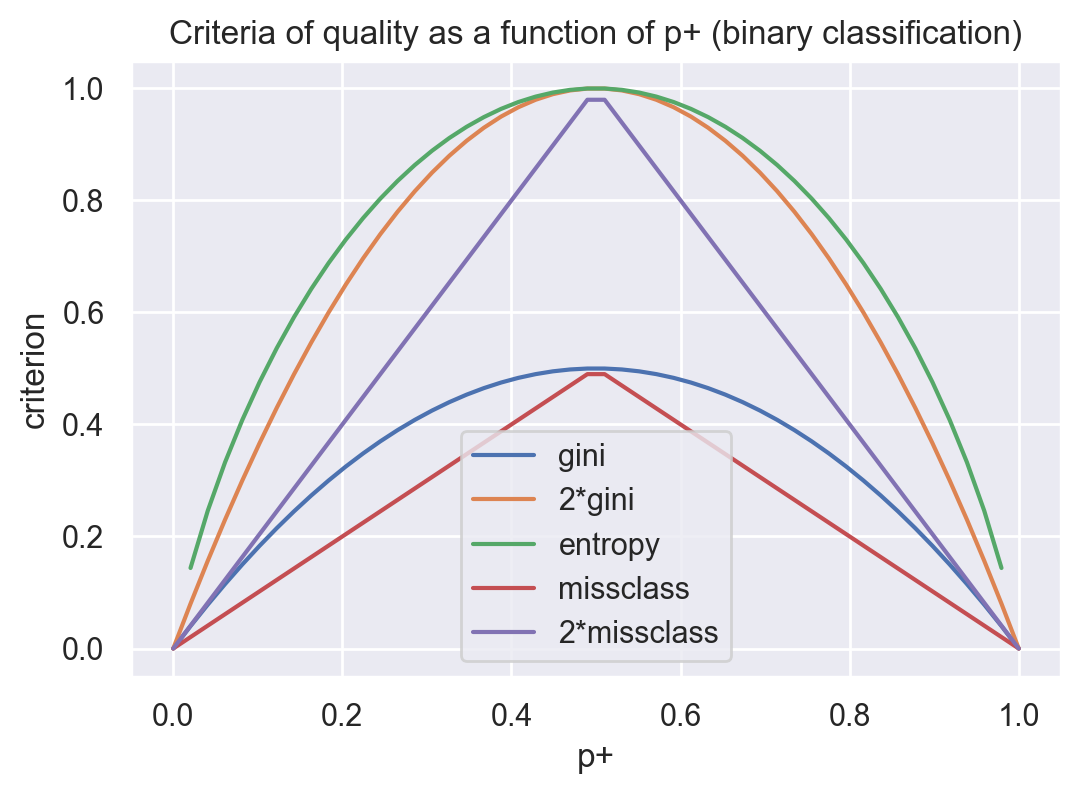

In [2]:
plt.figure(figsize=(6, 4))
xx = np.linspace(0, 1, 50)
plt.plot(xx, [2 * x * (1 - x) for x in xx], label="gini")
plt.plot(xx, [4 * x * (1 - x) for x in xx], label="2*gini")
plt.plot(xx, [-x * np.log2(x) - (1 - x) * np.log2(1 - x) for x in xx], label="entropy")
plt.plot(xx, [1 - max(x, 1 - x) for x in xx], label="missclass")
plt.plot(xx, [2 - 2 * max(x, 1 - x) for x in xx], label="2*missclass")
plt.xlabel("p+")
plt.ylabel("criterion")
plt.title("Criteria of quality as a function of p+ (binary classification)")
plt.legend();

### Example
Let's consider fitting a decision tree to some synthetic data. We will generate samples from two classes, both normal distributions but with different means.

In [3]:
# first class
np.random.seed(21)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Let's plot the data. Informally, the classification problem in this case is to build some _good_ boundary separating the two classes (the red dots from the yellow). Machine learning for this case boils down to choosing a good separating border. A straight line will be too simple while some complex curve snaking by each red dot will be too complex and will lead us to making mistakes on new samples. Intuitively, some smooth boundary, or at least a straight line or a hyperplane, would work well on new data.

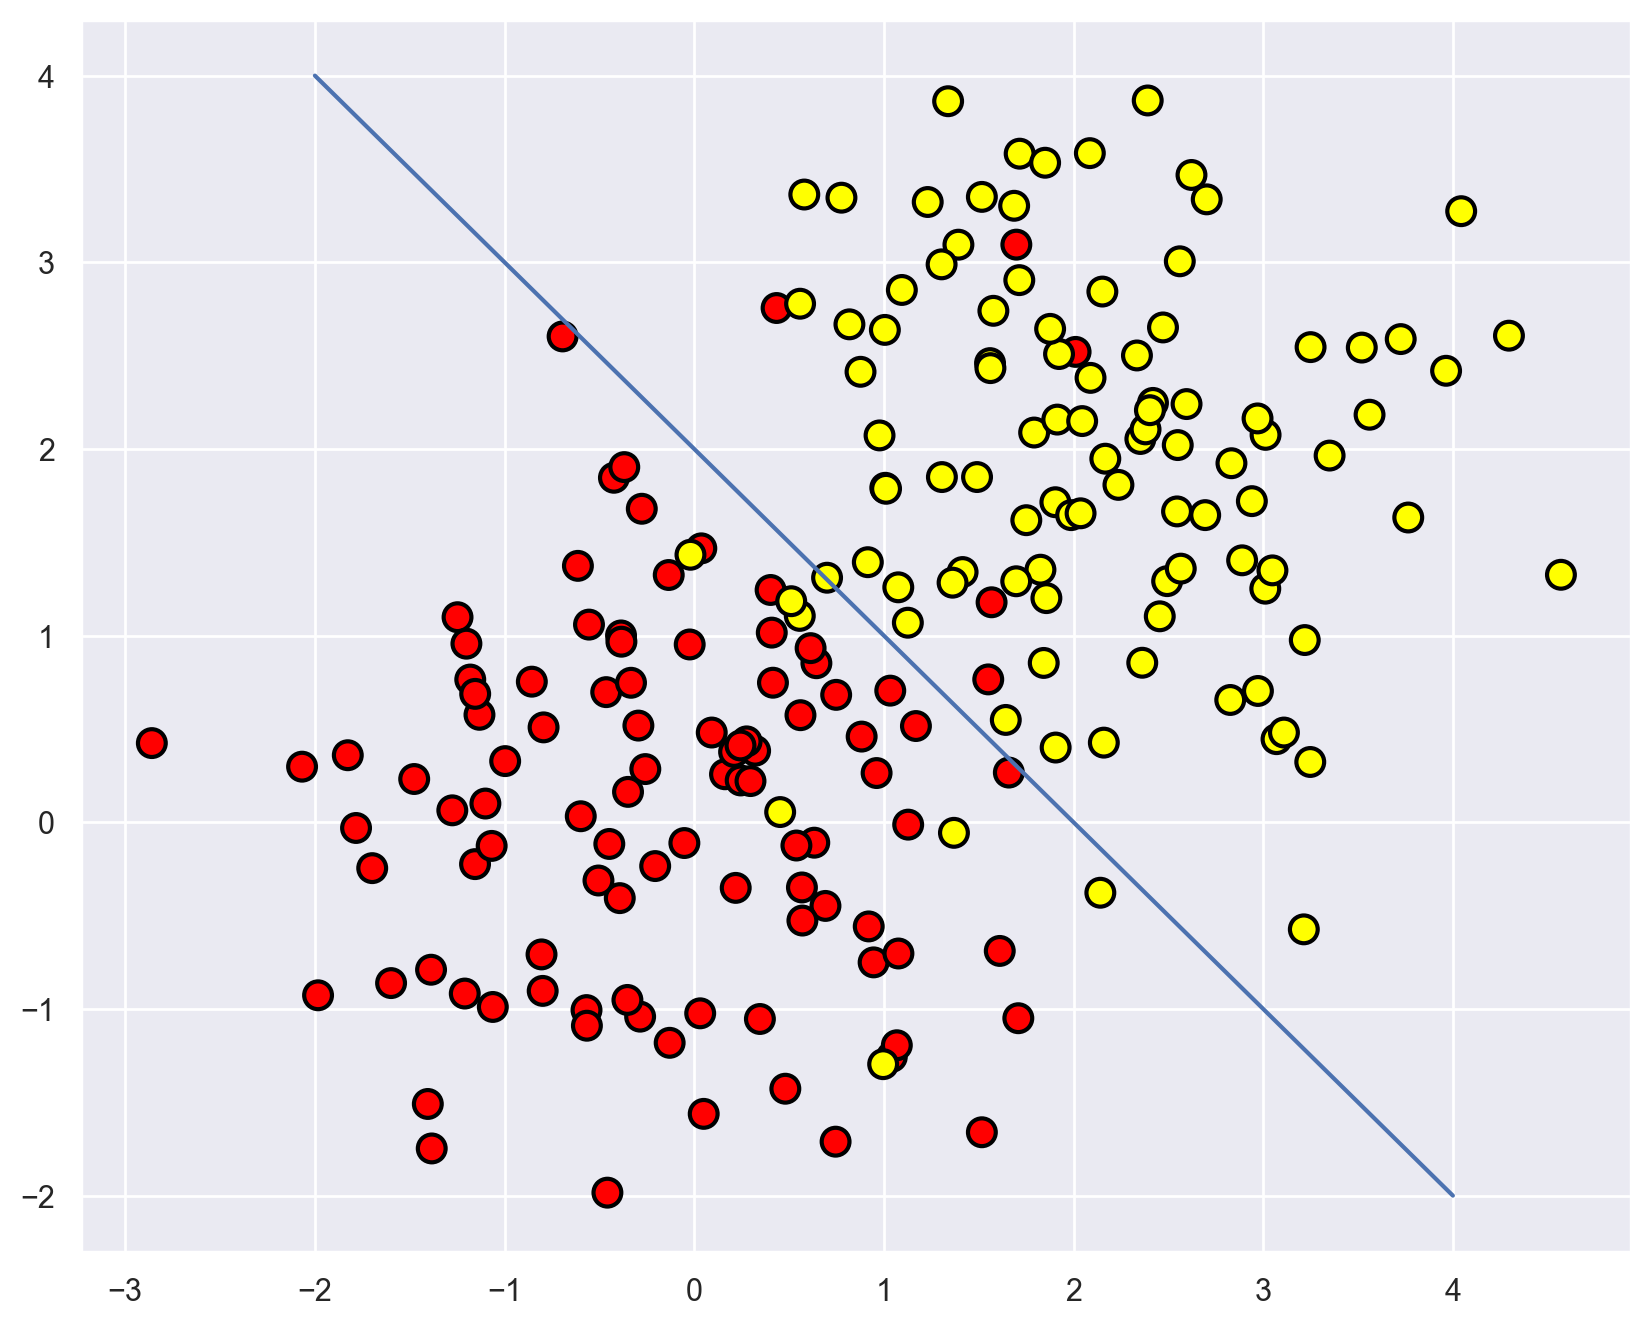

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

Let's try to separate these two classes by training an `Sklearn` decision tree. We will use `max_depth` parameter that limits the depth of the tree. Let's visualize the resulting separating boundary.

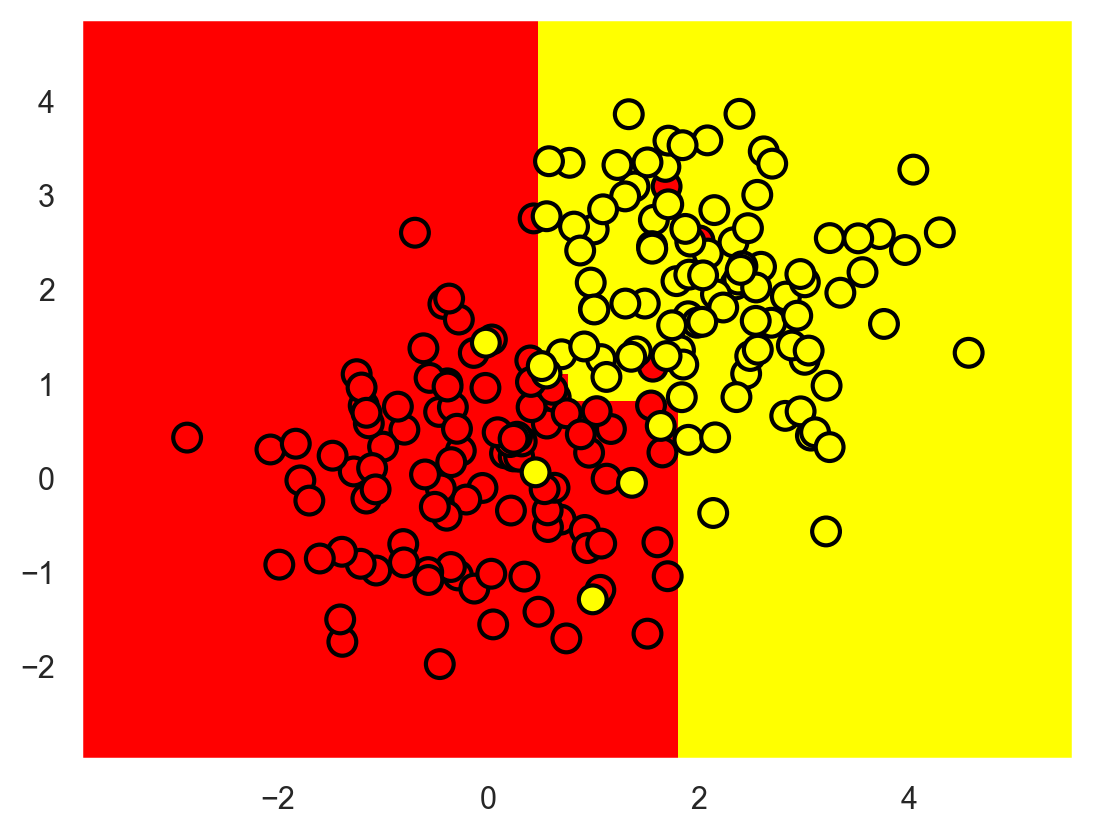

In [21]:
from sklearn.tree import DecisionTreeClassifier


# Let's write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

And how does the tree itself look? We see that the tree "cuts" the space into 8 rectangles, i.e. the tree has 8 leaves. Within each rectangle, the tree will make the prediction according to the majority label of the objects inside it.

In [2]:
%%capture
%pip install pydotplus

In [12]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython import display


def tree_graph_to_png(tree, feature_names):
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    return display.Image(graph.create_png())

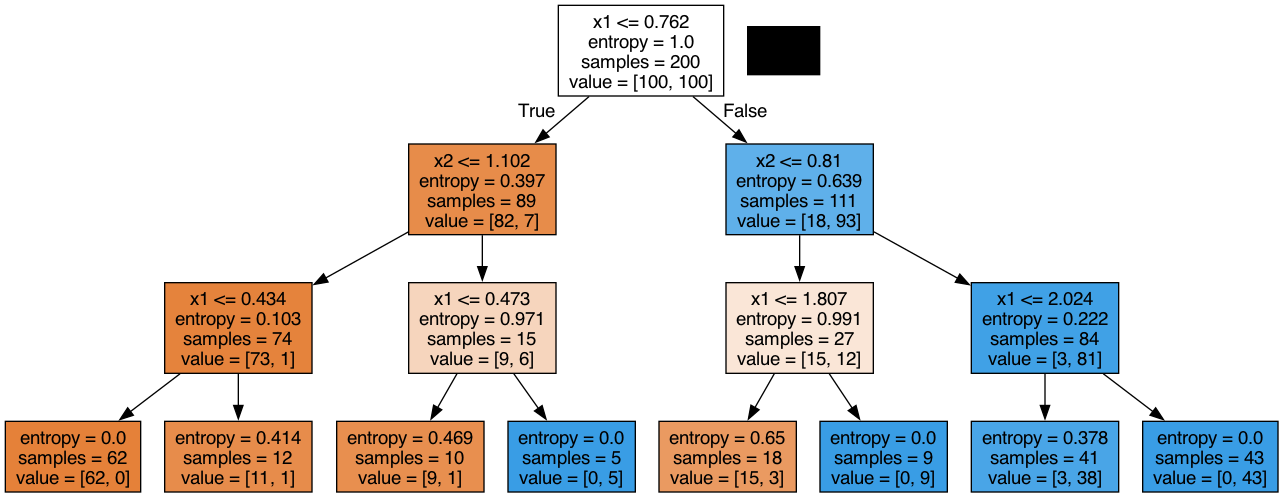

In [22]:
tree_graph_to_png(
    tree=clf_tree,
    feature_names=["x1", "x2"]
)

#### How can we read a tree?
In the beginning, there were 200 samples (instances), 100 of each class. The entropy of the initial state was maximal, $S=1$. Then, the first partition of the samples into 2 groups was made by comparing the value of $x_1$ with $0.762$. With that, the entropy of both left and right groups decreased. The process continues up to depth 3. In this visualization, the more samples of the first class, the darker the orange color of the vertex; the more samples of the second class, the darker the blue. At the beginning, the number of samples from two classes is equal, so the root node of the tree is white.

## How a Decision Tree Works with Numerical Features
Suppose we have a numeric feature `Age` that has a lot of unique values. A decision tree will look for the best (according to some criterion of information gain) split by checking binary attributes such as $Age < 18$, $Age < 23.77$, and so on. But what if the age range is large? Or what if another quantitative variable, `salary`, can also be _cut_ in many ways? There will be too many binary attributes to select from at each step during tree construction. To resolve this problem, heuristics are usually used to limit the number of thresholds to which we compare the quantitative variable.

Let's consider an example. Suppose we have the following dataset:

In [23]:
data = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)

Let's sort it by age in ascending order.

In [24]:
data.sort_values("Age")

Age  Loan Default
0    17             1
2    18             1
3    20             0
7    25             1
8    29             1
9    31             0
10   33             1
4    38             1
5    49             0
6    55             0
1    64             0

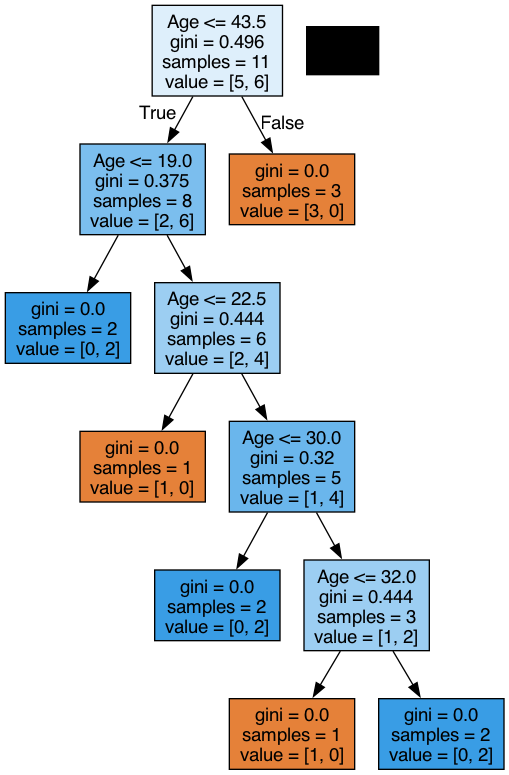

In [25]:
age_tree = DecisionTreeClassifier(random_state=21)
age_tree.fit(data["Age"].values.reshape(-1, 1), data["Loan Default"].values)

tree_graph_to_png(
    age_tree,
    feature_names=["Age"]
)

We see that the tree used the following 5 values to evaluate by age: 43.5, 19, 22.5, 30, and 32 years. If you look closely, these are exactly the mean values between the ages at which the target class _switches_ from 1 to 0 or 0 to 1. To illustrate further, 43.5 is the average of 38 and 49 years; a 38-year-old customer failed to return the loan whereas the 49-year-old did. The tree looks for the values at which the target class switches its value as a threshold for _cutting_ a quantitative variable.

Given this information, why do you think it makes no sense here to consider a feature like $Age <17.5$?

Let's consider a more complex example by adding the "Salary" variable (in the thousands of dollars per year).

In [26]:
data2 = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Salary": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)

If we sort by age, the target class (`loan default`) switches (from 1 to 0 or vice versa) 5 times. And if we sort by `salary`, it switches 7 times. How will the tree choose features now? Let's see.

In [27]:
data2.sort_values("Age")

Age  Salary  Loan Default
0    17      25             1
2    18      22             1
3    20      36             0
7    25      70             1
8    29      33             1
9    31     102             0
10   33      88             1
4    38      37             1
5    49      59             0
6    55      74             0
1    64      80             0

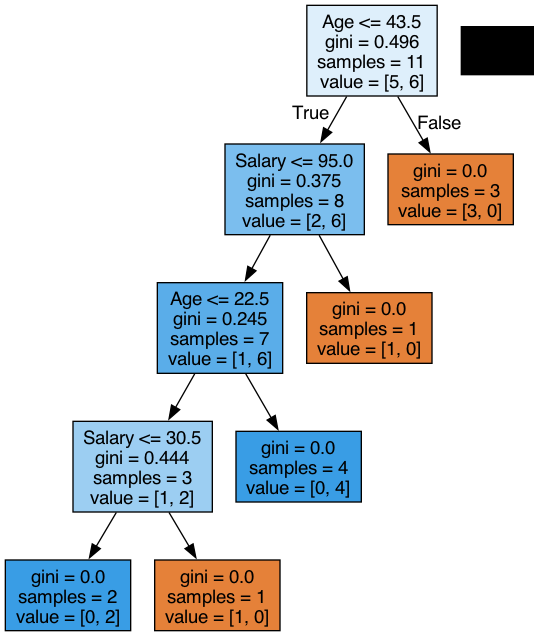

In [28]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[["Age", "Salary"]].values, data2["Loan Default"].values);

tree_graph_to_png(
    tree=age_sal_tree,
    feature_names=["Age", "Salary"]
)

We see that the tree partitioned by both salary and age. Moreover, the thresholds for feature comparisons are 43.5 and 22.5 years of age and 95 and 30.5 dollars of salary. Again, we see that 95 is the average between 88 and 102; the individual with a salary of 88 proved to be _bad_ while the one with 102 was _good_. The same goes for 30.5. That is, only a few values for comparisons by age and salary were searched. Why did the tree choose these features? Because they gave better partitioning (according to Gini uncertainty). 

### Conclusions
The simplest heuristics for handling numeric features in a decision tree is to sort its values in ascending order and check only those thresholds where the value of the target variable changes.

Furthermore, when there are a lot of numeric features in a dataset, each with a lot of unique values, only the top-N of the thresholds described above are selected, i.e. only use the top-N that give maximum gain. The process is to construct a tree of depth 1, compute the entropy (or Gini uncertainty), and select the best thresholds for comparison.

To illustrate, if we split by $Salary \leq 34.5$, the left subgroup will have an entropy of 0 (all clients are _bad_), and the right one will have an entropy of 0.954 (3 _bad_ and 5 _good_). The information gain is roughly 0.3.
If we split by $Salary \leq 95$, the left subgroup will have the entropy of 0.97 (6 _bad_ and 4 _good_), and the right one will have the entropy of 0 (a group containing only one object). The information gain is about 0.11.
If we calculate information gain for each partition in that manner, we can select the thresholds for comparison of each numeric feature before the construction of a large tree (using all features).

## Important Tree Parameters
Technically, you can build a decision tree until each leaf has exactly one instance, but this is not common in practice when building a single tree because it will be _overfitted_, or too tuned to the training set, and will not predict labels for new data well. At the bottom of the tree, at some great depth, there will be partitions on less important features (e.g. whether a client came from Kyiv or Lviv). We can exaggerate this story further and find that all four clients who came to the bank for a loan in green trousers did not return the loan. Even if that were true in training, we do not want our classification model to generate such specific rules.

There are two exceptions where the trees are built to the maximum depth:
- Random Forest (a group of trees) averages the responses from individual trees that are built to the maximum depth.
- _Pruning_ trees. In this approach, the tree is first constructed to the maximum depth. Then, from the bottom up, some nodes of the tree are removed by comparing the quality of the tree with and without that partition (comparison is performed using _cross-validation_).

The picture below is an example of a dividing border built in an overfitted tree. 

<img src="images/border.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

The most common ways to deal with overfitting in decision trees are as follows:
- artificial limitation of the depth or a minimum number of samples in the leaves: the construction of a tree just stops at some point;
- pruning the tree.

## DecisionTreeClassifier in Scikit-learn
The main parameters of the [`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class are:

- `max_depth` – the maximum depth of the tree;
- `max_features` - the maximum number of features with which to search for the best partition (this is necessary with a large number of features because it would be "expensive" to search for partitions for _all_ features);
- `min_samples_leaf` – the minimum number of samples in a leaf. This parameter prevents creating trees where any leaf would have only a few members.

The parameters of the tree need to be set depending on input data, and it is usually done by means of _cross-validation_.

## Side note on decision Tree in a Regression Problem

When predicting a numeric variable, the idea of a tree construction remains the same, but the quality criteria changes: 

- Variance: 

$$\Large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i - \frac{1}{\ell} \sum\limits_{j=1}^{\ell} y_j)^2, $$

where $\ell$ is the number of samples in a leaf, $y_i$ is the value of the target variable. Simply put, by minimizing the variance, we look for features that divide the training set in such a way that the values of the target feature in each leaf are roughly equal.

### Example
Let's generate some data distributed by the function $f(x) = e^{-x ^ 2} + 1.5 * e^{-(x - 2) ^ 2}$ with some noise. Then we will train a tree with this data and predictions that the tree makes.

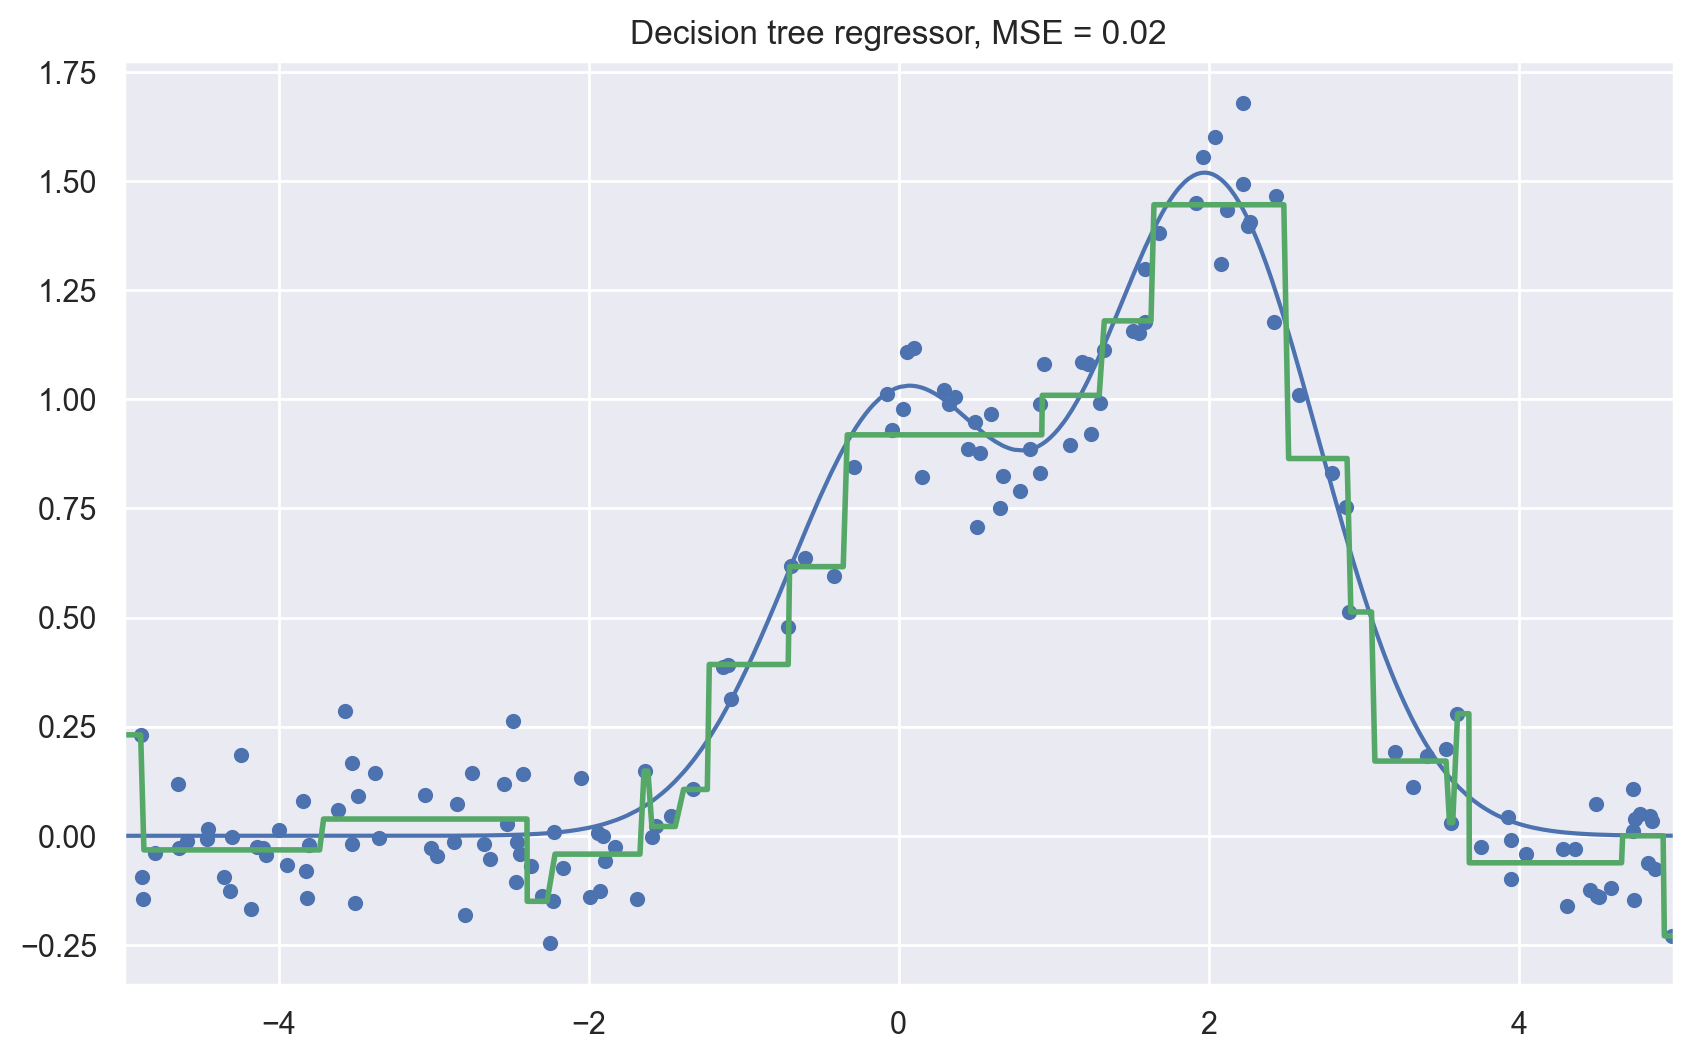

In [29]:
n_train = 150
n_test = 1000
noise = 0.1


def f(x):
    x = x.ravel()
    return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))


def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = (
        np.exp(-(X ** 2))
        + 1.5 * np.exp(-((X - 2) ** 2))
        + np.random.normal(0.0, noise, n_samples)
    )
    X = X.reshape((n_samples, 1))
    return X, y


X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title(
    "Decision tree regressor, MSE = %.2f"
    % (np.sum((y_test - reg_tree_pred) ** 2) / n_test)
)
plt.show()

We see that the decision tree approximates the data with a piecewise constant function.

# Random Forest

Random Forest is another example of an algorithm that is built on trees, just like Decision Trees. In contrast to Decision Tree, which only consists of a single tree, Random Forest employs a number of Decision Trees in order to make judgments, creating what is essentially a forest of trees.

It does this by combining a number of different models in order to produce predictions, and it may be used for both classification and regression.

<img src="images/rf.gif" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="75%">

Pros:
- Random Forests can handle non-linear relationships in the data easily.
- Random Forests implicitly perform feature selection.

Cons:
- Difficult to interpret because of multiple trees.
- __Random Forests are computationally expensive for large datasets__.

# Nearest Neighbors Method
__The nearest neighbors method__ (k-Nearest Neighbors, or k-NN) is another very popular classification method that is also sometimes used in regression problems. This, like decision trees, is one of the most comprehensible approaches to classification. The underlying intuition is that you look like your neighbors. More formally, the method follows the compactness hypothesis: if the distance between the examples is measured well enough, then similar examples are much more likely to belong to the same class.

According to the nearest neighbors method, the green ball would be classified as "blue" rather than "red".

<img src="images/knn.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

For another example, if you do not know how to tag a Bluetooth-headset on an Olx listing, you can find 5 similar headsets, and, if 4 of them are tagged as "accessories" and only 1 as "Technology", then you will also  label it under "accessories".

To classify each sample from the test set, one needs to perform the following operations in order:
1. Calculate the distance to each of the samples in the training set.
2. Select $k$ samples from the training set with the minimal distance to them.
3. The class of the test sample will be the most frequent class among those $k$ nearest neighbors.

The method adapts quite easily for the regression problem: on step 3, it returns not the class, but the number – a mean (or median) of the target variable among neighbors.

A notable feature of this approach is its laziness – calculations are only done during the prediction phase, when a test sample needs to be classified. No model is constructed from the training examples beforehand. In contrast, recall that for decision trees the tree is constructed based on the training set, and the classification of test cases occurs relatively quickly by traversing through the tree.

Nearest neighbors is a well-studied approach. There exist many important theorems claiming that, on "endless" datasets, it is the optimal method of classification. The authors of the classic book "The Elements of Statistical Learning" consider k-NN to be a theoretically ideal algorithm which usage is only limited by computation power and the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

## Nearest Neighbors Method in Real Applications
- k-NN can serve as a good starting point (baseline) in some cases;
- k-NN is often used for the construction of meta-features (i.e. k-NN predictions as input to other models);
- The nearest neighbors method extends to other tasks like recommendation systems. The initial decision could be a recommendation of a product (or service) that is popular among the _closest neighbors_ of the person for whom we want to make a recommendation;
- In practice, on large datasets, approximate methods of search are often used for nearest neighbors. There is a number of open source libraries that implement such algorithms; check out Spotify's library [Annoy](https://github.com/spotify/annoy).

The quality of classification/regression with k-NN depends on several parameters:

- The number of neighbors $k$.
- The distance measure between samples (common ones include Hamming, Euclidean, cosine, and Minkowski distances). Note that most of these metrics require data to be scaled. Simply speaking, we do not want the `salary` feature, which can be on the order of thousands, to affect the distance more than `age`, which is generally less than 100. 
- Weights of neighbors (each neighbor may contribute different weights; for example, the further the sample, the lower the weight).

## `KNeighborsClassifier` in Scikit-learn
The main parameters of the class `sklearn.neighbors.KNeighborsClassifier` are:
- weights: `uniform` (all weights are equal), `distance` (the weight is inversely proportional to the distance from the test sample), or any other user-defined function;
- algorithm (optional): `brute`, `ball_tree `, `KD_tree`, or `auto`. In the first case, the nearest neighbors for each test case are computed by a grid search over the training set. In the second and third cases, the distances between the examples are stored in a tree to accelerate finding nearest neighbors. If you set this parameter to `auto`, the right way to find the neighbors will be automatically chosen based on the training set.
- leaf_size (optional): threshold for switching to grid search if the algorithm for finding neighbors is BallTree or KDTree;
- metric: `minkowski`, `manhattan`, `euclidean`, `chebyshev`, or other.

# Choosing Model Parameters and Cross-Validation
The main task of learning algorithms is to be able to _generalize_ to unseen data. Since we cannot immediately check the model performance on new, incoming data (because we do not know the true values of the target variable yet), it is necessary to sacrifice a small portion of the data to check the quality of the model on it.

This is often done in one of two ways:
- setting aside a part of the dataset (*test/hold-out set*). Thus we reserve a fraction of the training set (typically from 20% to 40%), train the model on the remaining data (60-80% of the original set), and compute performance metrics for the model (e.g accuracy) on the hold-out set.
- *cross-validation*. The most frequent case here is *k-fold cross-validation*.

<img src="images/cross_validation.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="75%">

In k-fold cross-validation, the model is trained $K$ times on different ($K-1$) subsets of the original dataset (in white) and checked on the remaining subset (each time a different one, shown above in orange).
We obtain $K$ model quality assessments that are usually averaged to give an overall average quality of classification/regression.

Cross-validation provides a better assessment of the model quality on new data compared to the hold-out set approach. However, cross-validation is computationally expensive when you have a lot of data.

Cross-validation is a very important technique in machine learning and can also be applied in statistics and econometrics. It helps with hyperparameter tuning, model comparison, feature evaluation, etc. More details can be found in any classic textbook on machine (statistical) learning.

# Application Examples

We will be using the IRIS dataset to build a decision tree and kNN classifiers. The dataset contains information for three classes of the Iris plant, namely Iris Setosa, Iris Versicolour, and Iris Virginica, with the following attributes: sepal length, sepal width, petal length, and petal width.

Let's allocate 70% of the set for training (`X_train`, `y_train`) and 30% for the hold-out set (`X_holdout`, `y_holdout`). The hold-out set will not be involved in tuning the parameters of the models. We'll use it at the end, after tuning, to assess the quality of the resulting model. Let's train 2 models: decision tree and k-NN. We do not know what parameters are good, so we will assume some random ones: a tree depth of 3 and the number of nearest neighbors equal 5.

In [6]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris

df = load_iris()

X_train, X_holdout, y_train, y_holdout = train_test_split(
    df.data, df.target, test_size=0.3, random_state=21
)

tree = DecisionTreeClassifier(max_depth=3, random_state=21)
knn = KNeighborsClassifier(n_neighbors=5)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train);

Let's assess prediction quality on our hold-out set with a simple metric, the proportion of correct answers (accuracy). The decision tree did better: the percentage of correct answers is about 94% (decision tree) versus 89% (k-NN). Note that this performance is achieved by using random parameters.

In [7]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

0.9333333333333333

In [8]:
knn_pred = knn.predict(X_holdout_scaled)
accuracy_score(y_holdout, knn_pred)

0.8888888888888888

Now, let's identify the parameters for the tree using cross-validation. We'll tune the maximum depth and the maximum number of features used at each split. Here is the essence of how the `GridSearchCV` works: for each unique pair of values of `max_depth` and `max_features`, compute model performance with 5-fold cross-validation, and then select the best combination of parameters.

In [9]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {"max_depth": range(1, 11), "max_features": range(1, 5)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


Let's list the best parameters and the corresponding mean accuracy from cross-validation.

In [10]:
tree_grid.best_params_  # {'max_depth': 3, 'max_features': 4}

{'max_depth': 3, 'max_features': 4}

In [47]:
tree_grid.best_score_

0.9714285714285715

In [48]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.9333333333333333

Let's draw the resulting tree.

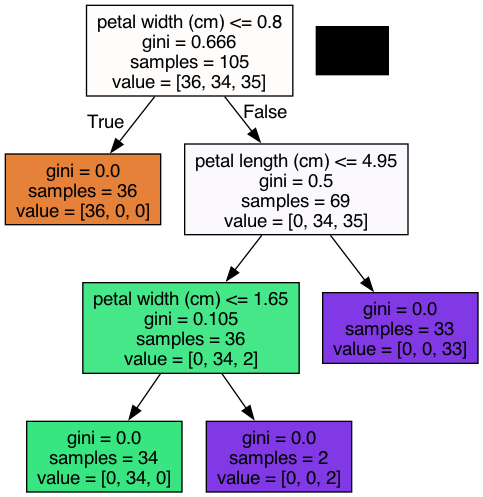

In [13]:
tree_graph_to_png(
    tree=tree_grid.best_estimator_,
    feature_names=df['feature_names']
)

Now, let's tune the number of neighbors $k$ for k-NN:

In [14]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(1, 11)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'knn__n_neighbors': 5}, 0.961904761904762)

In [54]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.8888888888888888

Here, the tree proved to be better than the nearest neighbors algorithm. Decision trees perform very well, and even random forest in this example cannot achieve much better performance despite being trained for much longer.

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

0.980952380952381


In [16]:
forest_params = {"max_depth": range(1, 11), "max_features": range(1, 5)}

forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

forest_grid.best_params_, forest_grid.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


({'max_depth': 3, 'max_features': 3}, 0.9904761904761905)

In [17]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout))

0.9333333333333333

# Pros and Cons of Decision Trees and the Nearest Neighbors Method

## Decision trees

Pros:
- Generation of clear human-understandable classification rules, e.g. "if age <25 and is interested in motorcycles, deny the loan". This property is called interpretability of the model.
- Decision trees can be easily visualized, i.e. both the model itself (the tree) and prediction for a certain test object (a path in the tree) can "be interpreted".
- Fast training and forecasting.
- Small number of model parameters.
- Supports both numerical and categorical features.

Cons:
- The trees are very sensitive to the noise in input data; the whole model could change if the training set is slightly modified (e.g. remove a feature, add some objects). This impairs the interpretability of the model.
- Separating border built by a decision tree has its limitations – it consists of hyperplanes perpendicular to one of the coordinate axes, which is inferior in quality to some other methods, in practice.
- We need to avoid overfitting by pruning, setting a minimum number of samples in each leaf, or defining a maximum depth for the tree. Note that overfitting is an issue for all machine learning methods.
- Instability. Small changes to the data can significantly change the decision tree. This problem is tackled with decision tree ensembles.
- The optimal decision tree search problem is NP-complete. Some heuristics are used in practice such as greedy search for a feature with maximum information gain, but it does not guarantee finding the globally optimal tree.
- Difficulties to support missing values in the data. Friedman estimated that it took about 50% of the code to support gaps in data in CART (an improved version of this algorithm is implemented in `sklearn`).
- The model can only interpolate but not extrapolate (the same is true for random forests and tree boosting). That is, a decision tree makes constant prediction for the objects that lie beyond the bounding box set by the training set in the feature space. In our example with the yellow and blue balls, it would mean that the model gives the same predictions for all balls with positions >19 or <0.

## The nearest neighbors method

Pros:
- Simple implementation;
- Well studied;
- Typically, the method is a good first solution not only for classification or regression, but also recommendations;
- It can be adapted to a certain problem by choosing the right metrics or kernel (in a nutshell, the kernel may set the similarity operation for complex objects such as graphs while keeping the k-NN approach the same);
- Good interpretability. There are exceptions: if the number of neighbors is large, the interpretability deteriorates ("We did not give him a loan, because he is similar to the 350 clients, of which 70 are the bad, and that is 12% higher than the average for the dataset").

Cons:
- Method considered fast in comparison with compositions of algorithms, but the number of neighbors used for classification is usually large (100-150) in real life, in which case the algorithm will not operate as fast as a decision tree.
- If a dataset has many variables, it is difficult to find the right weights and to determine which features are not important for classification/regression.
- Dependency on the selected distance metric between the objects. Selecting the Euclidean distance by default is often unfounded. You can find a good solution by grid searching over parameters, but this becomes very time consuming for large datasets.
- There are no theoretical ways to choose the number of neighbors – only grid search (though this is often true for all hyperparameters of all models). In the case of a small number of neighbors, the method is sensitive to outliers, that is, it is inclined to overfit.
- As a rule, it does not work well when there are a lot of features due to the "curse of dimensionality".